In [1]:
import pandas as pd
import numpy as np
import matplotlib. pyplot as plt
from pandas import DataFrame
from sklearn import linear_model
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.sandbox.regression.predstd import wls_prediction_std
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("darkgrid")

In [2]:
pwd

'C:\\Users\\THINK\\Desktop\\ACST890\\THQ2\\THQ2'

In [4]:
data = { 'Q': [80, 150, 135, 165, 95, 130, 110] ,
'L': [60, 100, 100, 120, 70, 90, 80 ] ,
'K': [50, 100, 80, 100, 60, 80, 70 ] 
}
label = pd.DataFrame(data , columns = [
'Output','Labour', 'Capital']
                    )

In [5]:
df = pd.DataFrame(data)

In [6]:
df

,Q,L,K
0,80,60,50
1,150,100,100
2,135,100,80
3,165,120,100
4,95,70,60
5,130,90,80
6,110,80,70


In [7]:
df.describe()

,Q,L,K
count,7.000000,7.000000,7.000000
mean,123.571429,88.571429,77.142857
std,30.237158,20.354010,18.898224
min,80.000000,60.000000,50.000000
25%,102.500000,75.000000,65.000000
50%,130.000000,90.000000,80.000000
75%,142.500000,100.000000,90.000000
max,165.000000,120.000000,100.000000


In [8]:
df.mean()

Q    123.571429
L     88.571429
K     77.142857
dtype: float64

In [9]:
df.var()

Q    914.285714
L    414.285714
K    357.142857
dtype: float64

In [10]:
df.std()

Q    30.237158
L    20.354010
K    18.898224
dtype: float64

In [11]:
df.median()

Q    130.0
L     90.0
K     80.0
dtype: float64

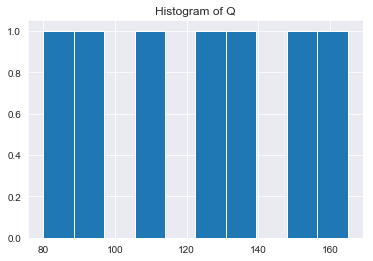

In [17]:
df_Q = df['Q']
plt.hist(df_Q)
plt.title(("Histogram of Q"))
plt.show()

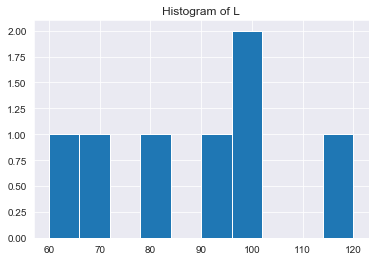

In [18]:
df_L = df['L']
plt.hist(df_L)
plt.title(("Histogram of L"))
plt.show()

In [19]:
log_df = np.log(df) 

In [20]:
log_df

,Q,L,K
0,4.382027,4.094345,3.912023
1,5.010635,4.605170,4.605170
2,4.905275,4.605170,4.382027
3,5.105945,4.787492,4.605170
4,4.553877,4.248495,4.094345
5,4.867534,4.499810,4.382027
6,4.700480,4.382027,4.248495


In [21]:
X = log_df[['L','K']]
Y = log_df['Q']

In [22]:
X

,L,K
0,4.094345,3.912023
1,4.605170,4.605170
2,4.605170,4.382027
3,4.787492,4.605170
4,4.248495,4.094345
5,4.499810,4.382027
6,4.382027,4.248495


In [23]:
Y

0    4.382027
1    5.010635
2    4.905275
3    5.105945
4    4.553877
5    4.867534
6    4.700480
Name: Q, dtype: float64

In [24]:
regr = linear_model.LinearRegression()
model = regr.fit(X, Y)

In [25]:
print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

Intercept: 
 0.14623321175616955
Coefficients: 
 [0.54842747 0.50874094]


In [151]:
model = sm.ols(formula = 'Q ~ L+K', data = log_df).fit()
model.summary()

C:\Users\THINK\Anaconda3\lib\site-packages\statsmodels\stats\stattools.py:72: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  "samples were given." % int(n), ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Q   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     958.4
Date:                Tue, 14 May 2019   Prob (F-statistic):           4.34e-06
Time:                        22:29:26   Log-Likelihood:                 21.712
No. Observations:                   7   AIC:                            -37.42
Df Residuals:                       4   BIC:                            -37.59
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1462      0.114      1.282      0.269      -0.170       0.463
L              0.5484      0.090      6.127      0.004       0.300       0.797
K              0.5087      0.083      6.150      0.004       0.279       0.738
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   2.801
Prob(Omnibus):                    nan   Jarque-Bera (JB):                2.261
Skew:                           1.352   Prob(JB):                        0.323
Kurtosis:                       3.665   Cond. No.                         160.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [26]:
Y_pred = model.predict(X)
residual = Y.values-Y_pred
residual

array([ 0.00013615, -0.00403834,  0.0041234 , -0.00871831, -0.0053085 ,
        0.02416568, -0.01036007])

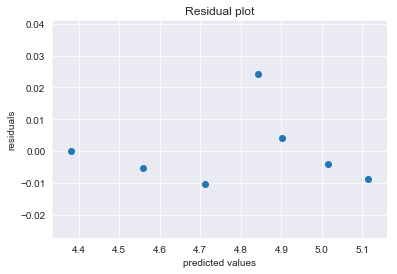

In [29]:
plt.scatter(Y_pred,residual)
plt.title(("Residual plot"))
plt.xlabel('predicted values')
plt.ylabel('residuals')
plt.show()

In [30]:
def r2(y_true, y_pred):
    sse  = np.square( y_pred - y_true ).sum()
    sst  = np.square( y_true - y_true.mean() ).sum()
    return 1 - sse/sst

In [35]:
R2 = r2(Y,Y_pred)
n = 7
p = 2
Adj_R2 = 1-(1-R2)*(n-1)/(n-p-1)
Adj_R2

0.9968763418198051